In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [2]:
df = pd.read_csv('data/product_demand.csv').dropna()
df['Date'] = pd.to_datetime(df['Date'])

demands = []
for index, row in df.iterrows():
    demands.append(int(row['Order_Demand'].strip('()')))
    
df['Order_Demand'] = demands
del demands

df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500


In [3]:
# total demand of all warehouses over time (line graph)
# find product in multiple warehouses (pie graph)
# total demand of some specific products over time (line graph)

In [4]:
# group total demand per warehouse by month
warehouse_df = df[['Warehouse', 'Date', 'Order_Demand']]
warehouse_df.head()

,Warehouse,Date,Order_Demand
0,Whse_J,2012-07-27,100
1,Whse_J,2012-01-19,500
2,Whse_J,2012-02-03,500
3,Whse_J,2012-02-09,500
4,Whse_J,2012-03-02,500


In [5]:
set(warehouse_df.Warehouse.values)

{'Whse_A', 'Whse_C', 'Whse_J', 'Whse_S'}

In [48]:
wa_df = warehouse_df.loc[warehouse_df.Warehouse == 'Whse_A'].set_index('Date').drop(columns='Warehouse').resample('M').sum()
wc_df = warehouse_df.loc[warehouse_df.Warehouse == 'Whse_C'].set_index('Date').drop(columns='Warehouse').resample('M').sum()
wj_df = warehouse_df.loc[warehouse_df.Warehouse == 'Whse_J'].set_index('Date').drop(columns='Warehouse').resample('M').sum()
ws_df = warehouse_df.loc[warehouse_df.Warehouse == 'Whse_S'].set_index('Date').drop(columns='Warehouse').resample('M').sum()

wa_df.drop(wa_df.head(12).index, inplace=True)
wc_df.drop(wc_df.head(4).index, inplace=True)
wc_df.drop(wc_df.tail(1).index, inplace=True)
wj_df.drop(wj_df.head(2).index, inplace=True)
wj_df.drop(wj_df.tail(1).index, inplace=True)
ws_df.drop(ws_df.head(7).index, inplace=True)
ws_df.drop(ws_df.tail(1).index, inplace=True)

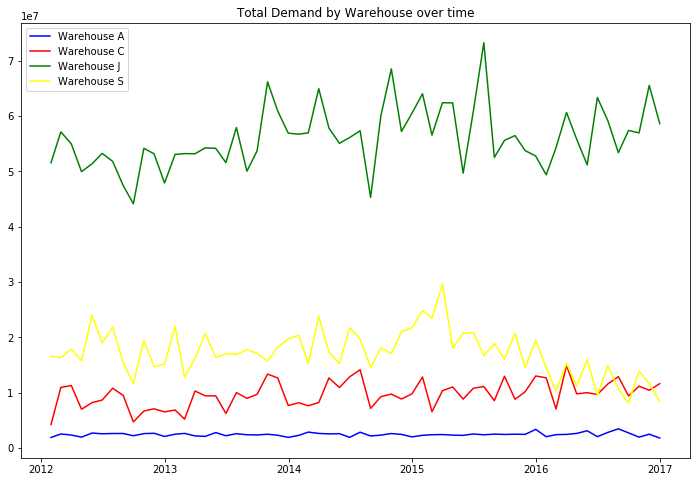

In [56]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.title('Total Demand by Warehouse Over Time')
plt.plot(wa_df, color='blue', label='Warehouse A')
plt.plot(wc_df, color='red', label='Warehouse C')
plt.plot(wj_df, color='green', label='Warehouse J')
plt.plot(ws_df, color='yellow', label='Warehouse S')
plt.legend(loc='best')
plt.show()

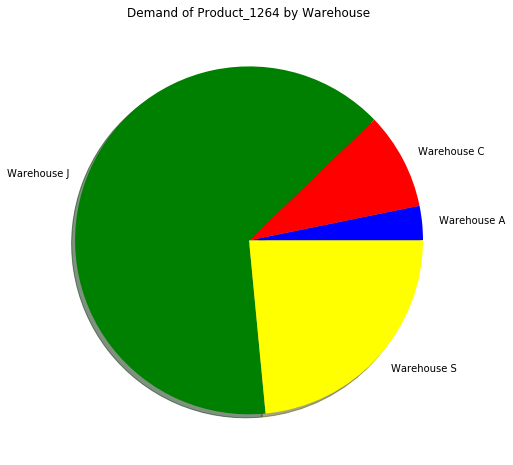

In [81]:
# demand of a specific product by warehouse
pie_df = df.loc[df.Product_Code == 'Product_1264'].drop(columns=['Product_Code', 'Date', 'Product_Category'])
pie_df = pie_df.groupby(['Warehouse']).sum()
labels = ['Warehouse A', 'Warehouse C', 'Warehouse J', 'Warehouse S']
colors = ['blue', 'red', 'green', 'yellow']
plt.title('Demand of Product_1264 by Warehouse')
plt.pie(pie_df['Order_Demand'], labels=labels, colors=colors, shadow=True)
plt.show()

In [129]:
from random import sample

In [152]:
possible_products = list(df['Product_Code'].value_counts()[:200].index)

In [202]:
products = sample(possible_products, 4)
dfs = []

for product in products:
    temp_df = df.loc[df.Product_Code == product]
    temp_df = temp_df.set_index('Date').drop(columns=['Warehouse', 'Product_Code', 'Product_Category']).resample('M').sum()
    dfs.append(temp_df)

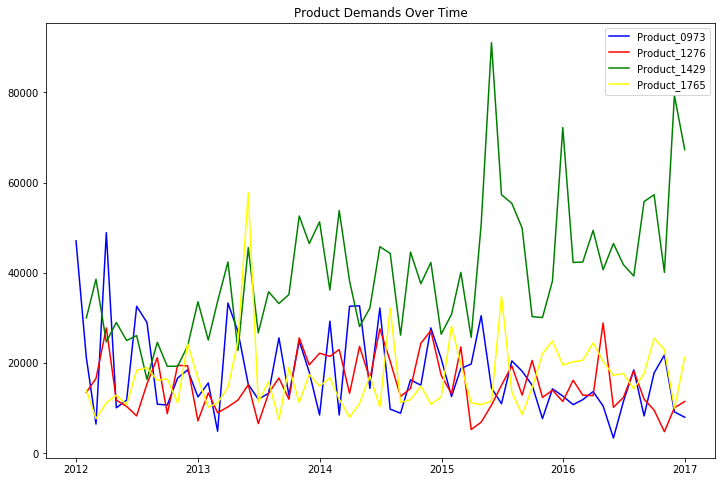

In [203]:
plt.rcParams['figure.figsize'] = [12, 8]
colors = ['blue', 'red', 'green', 'yellow']

plt.title('Product Demands Over Time')

for i in range(len(dfs)):
    plt.plot(dfs[i], color=colors[i], label=products[i])

plt.legend(loc='best')
plt.show()